## <center>  DS2 : Réseaux de Neurones </center>

Dans cet exercice nous utiliserons les réseaux de neurones sur l'ensemble de données **iris**. L'ensemble de données contient 50 échantillons pour chaque espèce de fleur d'iris (total de 150). 

Pour chaque échantillon, nous avons la longueur et la largeur des sépales, la longueur et la largeur des pétales et un nom d'espèce (classe/étiquette) (voir figure).

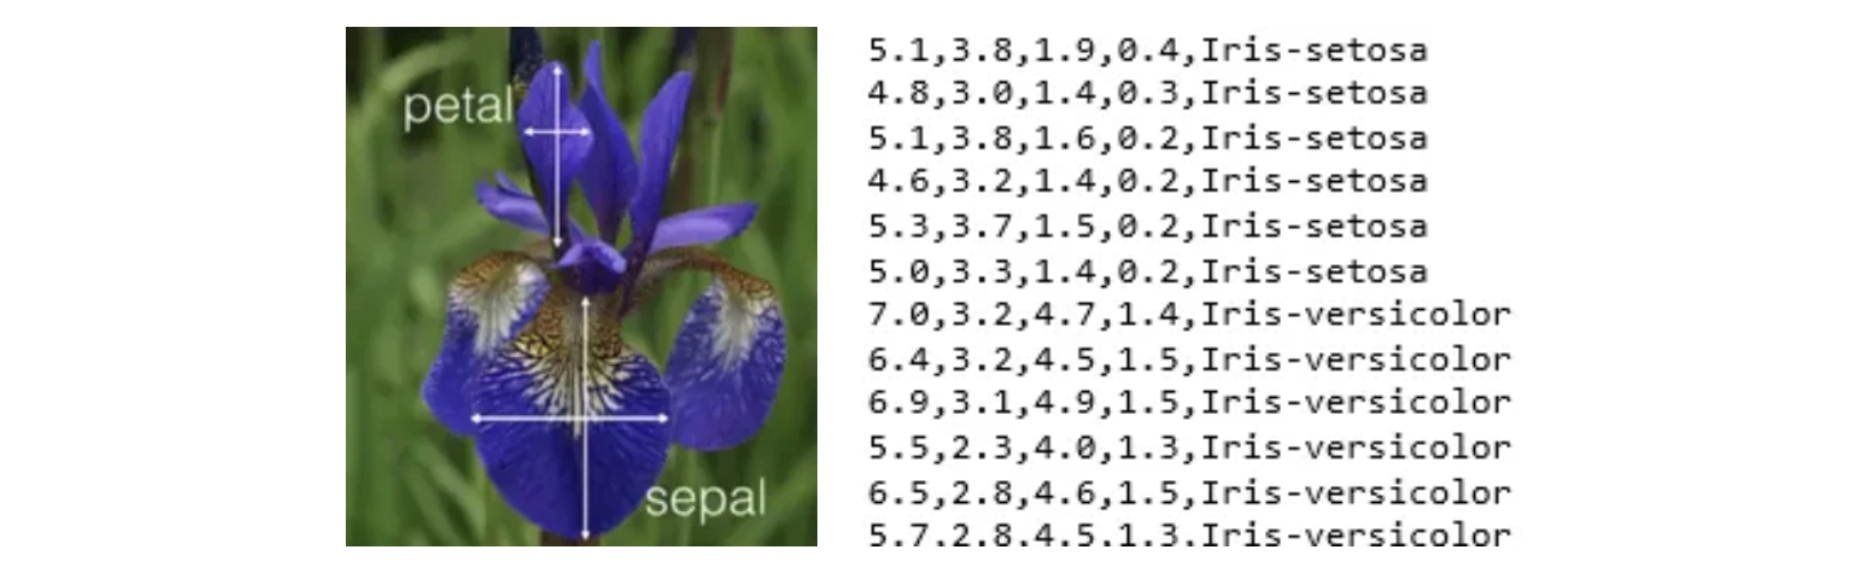


### 1- Préparation du dataset

In [19]:
#1- Importation des packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [20]:
#2- Chargement du iris data dans les variables: x et y
# Charger l'ensemble de données Iris
iris = load_iris()

# Extraire les caractéristiques (X) et les étiquettes (y)
x = iris.data
y = iris.target

# Afficher les premières lignes des caractéristiques et des étiquettes
print("Caractéristiques (x):")
print(x[:5])  # Affiche les premières 5 lignes des caractéristiques
print("\nÉtiquettes (y):")
print(y[:5])  # Affiche les premières 5 lignes des étiquettes


Caractéristiques (x):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Étiquettes (y):
[0 0 0 0 0]


In [21]:
#3- Mélanger ce dataset (x, y)
from sklearn.utils import shuffle

# Mélanger le dataset
x, y = shuffle(x, y, random_state=42)

# Afficher les premières lignes des caractéristiques et des étiquettes après mélange
print("Caractéristiques (x) après mélange :")
print(x[:5])
print("\nÉtiquettes (y) après mélange :")
print(y[:5])


Caractéristiques (x) après mélange :
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]

Étiquettes (y) après mélange :
[1 0 2 1 1]


In [22]:
#4- Affichage de dimensions de x et y
print(x.shape)
print(y.shape)


(150, 4)
(150,)


In [23]:
#5- train test split 30% pour les test
from sklearn.model_selection import train_test_split

# Diviser le dataset en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Afficher la taille des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement (x_train, y_train):", x_train.shape, y_train.shape)
print("Taille de l'ensemble de test (x_test, y_test):", x_test.shape, y_test.shape)




Taille de l'ensemble d'entraînement (x_train, y_train): (105, 4) (105,)
Taille de l'ensemble de test (x_test, y_test): (45, 4) (45,)


### 2- Création du reseau de neurone

In [24]:
# à l'aide du model Sequential de keras, créer le réseau de neurones suivant:
# couche cachée 1 :( neurones: 10 , activation: relu )
# couche cachée 2 :( neurones: 5 , activation: relu )
# couche sortie  :( neurones: 3 , activation: ?? )
#chaque neurone de la couche de sortie donne la probabilité d'apartenance d'un exemple à une des trois classes

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Créer le modèle séquentiel
model = Sequential()

# Ajouter la couche cachée 1 avec 10 neurones et activation 'relu'
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))

# Ajouter la couche cachée 2 avec 5 neurones et activation 'relu'
model.add(Dense(5, activation='relu'))

# Ajouter la couche de sortie avec 3 neurones (correspondant aux classes) et activation 'softmax'
model.add(Dense(3, activation='softmax'))

# Compiler le modèle avec l'optimiseur, la fonction de perte et les métriques appropriées
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 
Total params: 123 (492.00 Byte)
Trainable params: 123 (492.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
#La forme actuel de y_train et y_test sont inadiquates à la structure du réseau ANN2
#faire les transformation nécessaires

from tensorflow.keras.utils import to_categorical

# Convertir les étiquettes en format one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Afficher les premières lignes des étiquettes après transformation
print("Étiquettes d'entraînement après transformation:")
print(y_train_one_hot[:5])

print("\nÉtiquettes de test après transformation:")
print(y_test_one_hot[:5])


Étiquettes d'entraînement après transformation:
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]

Étiquettes de test après transformation:
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [30]:
# Utiliser categorical_crossentropy comme fonction de perte
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
# Entraîner le modèle
history = model.fit(
    x_train, y_train_one_hot,
    epochs=500,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

Epoch 1/500
3/3 - 2s - loss: 0.5518 - accuracy: 0.7979 - val_loss: 0.4661 - val_accuracy: 0.8182 - 2s/epoch - 635ms/step
Epoch 2/500
3/3 - 0s - loss: 0.5509 - accuracy: 0.7872 - val_loss: 0.4656 - val_accuracy: 0.8182 - 96ms/epoch - 32ms/step
Epoch 3/500
3/3 - 0s - loss: 0.5504 - accuracy: 0.7872 - val_loss: 0.4649 - val_accuracy: 0.8182 - 93ms/epoch - 31ms/step
Epoch 4/500
3/3 - 0s - loss: 0.5496 - accuracy: 0.8085 - val_loss: 0.4646 - val_accuracy: 0.8182 - 95ms/epoch - 32ms/step
Epoch 5/500
3/3 - 0s - loss: 0.5490 - accuracy: 0.8085 - val_loss: 0.4640 - val_accuracy: 0.8182 - 94ms/epoch - 31ms/step
Epoch 6/500
3/3 - 0s - loss: 0.5485 - accuracy: 0.8085 - val_loss: 0.4630 - val_accuracy: 0.8182 - 83ms/epoch - 28ms/step
Epoch 7/500
3/3 - 0s - loss: 0.5478 - accuracy: 0.8191 - val_loss: 0.4619 - val_accuracy: 0.8182 - 97ms/epoch - 32ms/step
Epoch 8/500
3/3 - 0s - loss: 0.5471 - accuracy: 0.8191 - val_loss: 0.4612 - val_accuracy: 0.8182 - 100ms/epoch - 33ms/step
Epoch 9/500
3/3 - 0s - l

Epoch 68/500
3/3 - 0s - loss: 0.5093 - accuracy: 0.8404 - val_loss: 0.4155 - val_accuracy: 1.0000 - 101ms/epoch - 34ms/step
Epoch 69/500
3/3 - 0s - loss: 0.5088 - accuracy: 0.8404 - val_loss: 0.4146 - val_accuracy: 1.0000 - 95ms/epoch - 32ms/step
Epoch 70/500
3/3 - 0s - loss: 0.5081 - accuracy: 0.8404 - val_loss: 0.4141 - val_accuracy: 1.0000 - 99ms/epoch - 33ms/step
Epoch 71/500
3/3 - 0s - loss: 0.5075 - accuracy: 0.8404 - val_loss: 0.4135 - val_accuracy: 1.0000 - 107ms/epoch - 36ms/step
Epoch 72/500
3/3 - 0s - loss: 0.5070 - accuracy: 0.8404 - val_loss: 0.4130 - val_accuracy: 1.0000 - 91ms/epoch - 30ms/step
Epoch 73/500
3/3 - 0s - loss: 0.5066 - accuracy: 0.8404 - val_loss: 0.4119 - val_accuracy: 1.0000 - 78ms/epoch - 26ms/step
Epoch 74/500
3/3 - 0s - loss: 0.5058 - accuracy: 0.8404 - val_loss: 0.4113 - val_accuracy: 1.0000 - 86ms/epoch - 29ms/step
Epoch 75/500
3/3 - 0s - loss: 0.5052 - accuracy: 0.8404 - val_loss: 0.4107 - val_accuracy: 1.0000 - 89ms/epoch - 30ms/step
Epoch 76/500
3

Epoch 135/500
3/3 - 0s - loss: 0.4715 - accuracy: 0.8404 - val_loss: 0.3737 - val_accuracy: 1.0000 - 125ms/epoch - 42ms/step
Epoch 136/500
3/3 - 0s - loss: 0.4711 - accuracy: 0.8404 - val_loss: 0.3726 - val_accuracy: 1.0000 - 104ms/epoch - 35ms/step
Epoch 137/500
3/3 - 0s - loss: 0.4705 - accuracy: 0.8404 - val_loss: 0.3720 - val_accuracy: 1.0000 - 113ms/epoch - 38ms/step
Epoch 138/500
3/3 - 0s - loss: 0.4700 - accuracy: 0.8404 - val_loss: 0.3717 - val_accuracy: 1.0000 - 133ms/epoch - 44ms/step
Epoch 139/500
3/3 - 0s - loss: 0.4694 - accuracy: 0.8404 - val_loss: 0.3712 - val_accuracy: 1.0000 - 140ms/epoch - 47ms/step
Epoch 140/500
3/3 - 0s - loss: 0.4689 - accuracy: 0.8404 - val_loss: 0.3709 - val_accuracy: 1.0000 - 147ms/epoch - 49ms/step
Epoch 141/500
3/3 - 0s - loss: 0.4683 - accuracy: 0.8404 - val_loss: 0.3703 - val_accuracy: 1.0000 - 148ms/epoch - 49ms/step
Epoch 142/500
3/3 - 0s - loss: 0.4678 - accuracy: 0.8404 - val_loss: 0.3697 - val_accuracy: 1.0000 - 125ms/epoch - 42ms/step


Epoch 201/500
3/3 - 0s - loss: 0.4388 - accuracy: 0.8404 - val_loss: 0.3410 - val_accuracy: 1.0000 - 69ms/epoch - 23ms/step
Epoch 202/500
3/3 - 0s - loss: 0.4383 - accuracy: 0.8404 - val_loss: 0.3408 - val_accuracy: 1.0000 - 103ms/epoch - 34ms/step
Epoch 203/500
3/3 - 0s - loss: 0.4379 - accuracy: 0.8617 - val_loss: 0.3407 - val_accuracy: 1.0000 - 88ms/epoch - 29ms/step
Epoch 204/500
3/3 - 0s - loss: 0.4373 - accuracy: 0.8723 - val_loss: 0.3402 - val_accuracy: 1.0000 - 149ms/epoch - 50ms/step
Epoch 205/500
3/3 - 0s - loss: 0.4373 - accuracy: 0.8723 - val_loss: 0.3400 - val_accuracy: 1.0000 - 98ms/epoch - 33ms/step
Epoch 206/500
3/3 - 0s - loss: 0.4366 - accuracy: 0.8723 - val_loss: 0.3394 - val_accuracy: 1.0000 - 139ms/epoch - 46ms/step
Epoch 207/500
3/3 - 0s - loss: 0.4360 - accuracy: 0.8723 - val_loss: 0.3390 - val_accuracy: 1.0000 - 138ms/epoch - 46ms/step
Epoch 208/500
3/3 - 0s - loss: 0.4360 - accuracy: 0.8723 - val_loss: 0.3383 - val_accuracy: 1.0000 - 90ms/epoch - 30ms/step
Epoc

Epoch 267/500
3/3 - 0s - loss: 0.4104 - accuracy: 0.8830 - val_loss: 0.3160 - val_accuracy: 1.0000 - 83ms/epoch - 28ms/step
Epoch 268/500
3/3 - 0s - loss: 0.4100 - accuracy: 0.8830 - val_loss: 0.3153 - val_accuracy: 1.0000 - 76ms/epoch - 25ms/step
Epoch 269/500
3/3 - 0s - loss: 0.4096 - accuracy: 0.8830 - val_loss: 0.3151 - val_accuracy: 1.0000 - 114ms/epoch - 38ms/step
Epoch 270/500
3/3 - 0s - loss: 0.4091 - accuracy: 0.8830 - val_loss: 0.3148 - val_accuracy: 1.0000 - 164ms/epoch - 55ms/step
Epoch 271/500
3/3 - 0s - loss: 0.4086 - accuracy: 0.8830 - val_loss: 0.3143 - val_accuracy: 1.0000 - 69ms/epoch - 23ms/step
Epoch 272/500
3/3 - 0s - loss: 0.4083 - accuracy: 0.8830 - val_loss: 0.3140 - val_accuracy: 1.0000 - 62ms/epoch - 21ms/step
Epoch 273/500
3/3 - 0s - loss: 0.4080 - accuracy: 0.8830 - val_loss: 0.3138 - val_accuracy: 1.0000 - 68ms/epoch - 23ms/step
Epoch 274/500
3/3 - 0s - loss: 0.4082 - accuracy: 0.8830 - val_loss: 0.3129 - val_accuracy: 1.0000 - 127ms/epoch - 42ms/step
Epoch

Epoch 333/500
3/3 - 0s - loss: 0.3856 - accuracy: 0.8830 - val_loss: 0.2955 - val_accuracy: 1.0000 - 59ms/epoch - 20ms/step
Epoch 334/500
3/3 - 0s - loss: 0.3849 - accuracy: 0.8830 - val_loss: 0.2949 - val_accuracy: 1.0000 - 51ms/epoch - 17ms/step
Epoch 335/500
3/3 - 0s - loss: 0.3857 - accuracy: 0.8830 - val_loss: 0.2942 - val_accuracy: 1.0000 - 48ms/epoch - 16ms/step
Epoch 336/500
3/3 - 0s - loss: 0.3847 - accuracy: 0.8830 - val_loss: 0.2940 - val_accuracy: 1.0000 - 63ms/epoch - 21ms/step
Epoch 337/500
3/3 - 0s - loss: 0.3841 - accuracy: 0.8830 - val_loss: 0.2937 - val_accuracy: 1.0000 - 50ms/epoch - 17ms/step
Epoch 338/500
3/3 - 0s - loss: 0.3840 - accuracy: 0.8830 - val_loss: 0.2934 - val_accuracy: 1.0000 - 48ms/epoch - 16ms/step
Epoch 339/500
3/3 - 0s - loss: 0.3848 - accuracy: 0.8830 - val_loss: 0.2939 - val_accuracy: 1.0000 - 48ms/epoch - 16ms/step
Epoch 340/500
3/3 - 0s - loss: 0.3831 - accuracy: 0.8830 - val_loss: 0.2936 - val_accuracy: 1.0000 - 49ms/epoch - 16ms/step
Epoch 34

Epoch 399/500
3/3 - 0s - loss: 0.3637 - accuracy: 0.8936 - val_loss: 0.2782 - val_accuracy: 1.0000 - 58ms/epoch - 19ms/step
Epoch 400/500
3/3 - 0s - loss: 0.3633 - accuracy: 0.8936 - val_loss: 0.2778 - val_accuracy: 1.0000 - 81ms/epoch - 27ms/step
Epoch 401/500
3/3 - 0s - loss: 0.3632 - accuracy: 0.8830 - val_loss: 0.2774 - val_accuracy: 1.0000 - 91ms/epoch - 30ms/step
Epoch 402/500
3/3 - 0s - loss: 0.3632 - accuracy: 0.8830 - val_loss: 0.2774 - val_accuracy: 1.0000 - 82ms/epoch - 27ms/step
Epoch 403/500
3/3 - 0s - loss: 0.3625 - accuracy: 0.8936 - val_loss: 0.2773 - val_accuracy: 1.0000 - 114ms/epoch - 38ms/step
Epoch 404/500
3/3 - 0s - loss: 0.3623 - accuracy: 0.8830 - val_loss: 0.2768 - val_accuracy: 1.0000 - 82ms/epoch - 27ms/step
Epoch 405/500
3/3 - 0s - loss: 0.3618 - accuracy: 0.8830 - val_loss: 0.2767 - val_accuracy: 1.0000 - 156ms/epoch - 52ms/step
Epoch 406/500
3/3 - 0s - loss: 0.3617 - accuracy: 0.8936 - val_loss: 0.2764 - val_accuracy: 1.0000 - 90ms/epoch - 30ms/step
Epoch 

Epoch 465/500
3/3 - 0s - loss: 0.3450 - accuracy: 0.8936 - val_loss: 0.2632 - val_accuracy: 1.0000 - 90ms/epoch - 30ms/step
Epoch 466/500
3/3 - 0s - loss: 0.3442 - accuracy: 0.9043 - val_loss: 0.2630 - val_accuracy: 1.0000 - 111ms/epoch - 37ms/step
Epoch 467/500
3/3 - 0s - loss: 0.3440 - accuracy: 0.9149 - val_loss: 0.2632 - val_accuracy: 1.0000 - 101ms/epoch - 34ms/step
Epoch 468/500
3/3 - 0s - loss: 0.3445 - accuracy: 0.9149 - val_loss: 0.2635 - val_accuracy: 1.0000 - 91ms/epoch - 30ms/step
Epoch 469/500
3/3 - 0s - loss: 0.3434 - accuracy: 0.9149 - val_loss: 0.2632 - val_accuracy: 1.0000 - 131ms/epoch - 44ms/step
Epoch 470/500
3/3 - 0s - loss: 0.3430 - accuracy: 0.9149 - val_loss: 0.2626 - val_accuracy: 1.0000 - 53ms/epoch - 18ms/step
Epoch 471/500
3/3 - 0s - loss: 0.3426 - accuracy: 0.9149 - val_loss: 0.2622 - val_accuracy: 1.0000 - 119ms/epoch - 40ms/step
Epoch 472/500
3/3 - 0s - loss: 0.3429 - accuracy: 0.9149 - val_loss: 0.2617 - val_accuracy: 1.0000 - 98ms/epoch - 33ms/step
Epoc

In [33]:
# Prédire les probabilités pour chaque classe
y_prob = model.predict(x_test)
print(f"on a shape of y_prob : {y_prob.shape}\n avec les valeurs de y_prob :\n {y_prob}\n\n")

# Obtenir la classe prédite pour chaque exemple
y_pred = np.argmax(y_prob, axis=1)
print(f"on a shape of y_pred : {y_pred.shape}\n avec les valeurs de y_pred :\n {y_pred}\n\n")

# Afficher le rapport de classification
print("Rapport de classification :\n", classification_report(y_test, y_pred))


2/2 [==============================] - 0s 9ms/step
on a shape of y_prob : (45, 3)
 avec les valeurs de y_prob :
 [[9.3707042e-03 3.0663109e-01 6.8399829e-01]
 [2.4220444e-06 7.4350137e-01 2.5649622e-01]
 [6.6031411e-08 8.6170125e-01 1.3829871e-01]
 [8.7042224e-01 1.0652301e-02 1.1892549e-01]
 [1.0108811e-02 3.0256644e-01 6.8732476e-01]
 [8.7042224e-01 1.0652301e-02 1.1892549e-01]
 [2.3325554e-06 7.4504417e-01 2.5495350e-01]
 [1.6318070e-07 8.3740181e-01 1.6259801e-01]
 [8.7042224e-01 1.0652301e-02 1.1892549e-01]
 [8.7042224e-01 1.0652301e-02 1.1892549e-01]
 [5.2453220e-06 7.1038318e-01 2.8961161e-01]
 [8.7042224e-01 1.0652301e-02 1.1892549e-01]
 [4.1417982e-07 8.0873770e-01 1.9126195e-01]
 [2.1176723e-07 8.2976526e-01 1.7023459e-01]
 [1.0568202e-01 1.7538878e-01 7.1892917e-01]
 [8.7042224e-01 1.0652301e-02 1.1892549e-01]
 [3.6347214e-02 2.3465885e-01 7.2899395e-01]
 [2.5112237e-07 8.2461125e-01 1.7538849e-01]
 [4.0950958e-08 8.7321615e-01 1.2678379e-01]
 [8.7042224e-01 1.0652301e-02 1.

In [34]:
# A quelle classe appartient le fleur avec les mesures suivants
#longueur du sépale : 5.4
#largeur des sépale : 3.9
#longueur du pétale : 1.3
#largeur du pétale  : 0.4


# Prétraiter les nouvelles données
new_data = np.array([[5.4, 3.9, 1.3, 0.4]])  # Assurez-vous que la forme est correcte
# Appliquer le même prétraitement que pour les données d'entraînement (par exemple, normalisation)

# Prédire la classe
predicted_probabilities = model.predict(new_data)
print(f"on a shape of predicted_probabilities : {predicted_probabilities.shape}\n avec les valeurs de predicted_probabilities :\n {predicted_probabilities}\n\n")

predicted_class = np.argmax(predicted_probabilities)

print("La fleur appartient à la classe :", predicted_class)



1/1 [==============================] - 0s 66ms/step
on a shape of predicted_probabilities : (1, 3)
 avec les valeurs de predicted_probabilities :
 [[0.87042224 0.0106523  0.11892549]]


La fleur appartient à la classe : 0
